<h1>Objective: From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.</h1>

<h1> K-Means Clustering </h1>

<h2>Author: Aditi Chamoli</h2>

<H1>Importing libraries</H1>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

<h1> Loading the iris dataset </h1>

In [31]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<h1>Finding the optimum number of clusters for k-means classification using the elbow method</h1>

In [20]:
x = iris_data.iloc[:,:].values
wcss=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

<h1>Plotting the graph</h1>

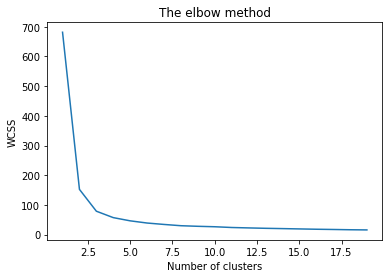

In [36]:
plt.plot(range(1, 20), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

<h2>From this we choose the number of clusters = 3<h2>

<h1>Applying kmeans to the dataset</h1>

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 400, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

<h1>Visualising the clusters - On the first two columns</h1>

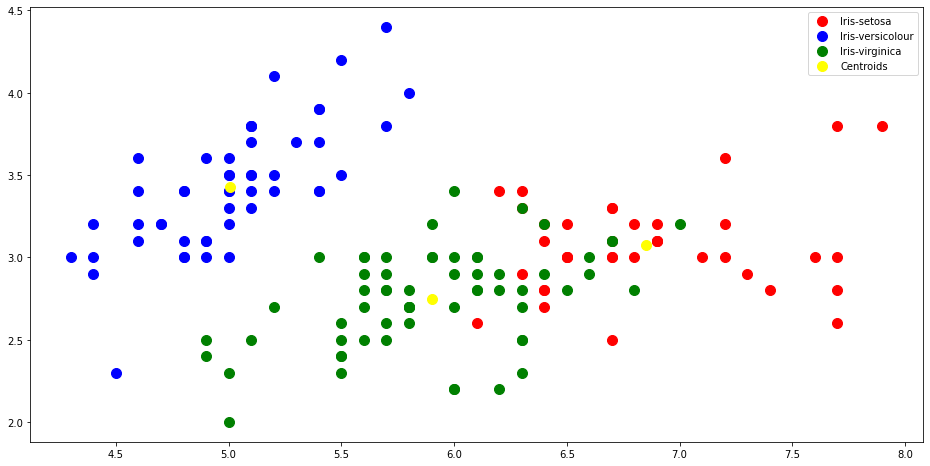

In [30]:
plt.figure(figsize=(16,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()